<a href="https://colab.research.google.com/github/DJCordhose/ai/blob/master/docs/img/football/embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q tf-nightly-gpu-2.0-preview

     |████████████████████████████████| 378.8MB 60kB/s 
     |████████████████████████████████| 450kB 38.9MB/s 
     |████████████████████████████████| 61kB 20.6MB/s 
     |████████████████████████████████| 4.1MB 32.0MB/s 


In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0-dev20190729


In [3]:
!curl https://raw.githubusercontent.com/DJCordhose/ai/master//docs/img/football/playerData.json -O

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 35084  100 35084    0     0  57703      0 --:--:-- --:--:-- --:--:-- 57799


In [0]:
import pandas as pd

In [0]:
df = pd.read_json('playerData.json')

In [53]:
df.shape

(31, 35)

In [6]:
df.head()

,Assists,BallControlPhases,CardsRed,CardsYellow,CardsYellowRed,CrossesNotSuccessfulSum,CrossesSuccessfulSum,CrossesSum,FoulsAgainstOpponent,FreeKicksSum,GoalContribution,Height,MatchMinutes,Name,OwnGoals,PassesNotSuccessfulSum,PassesSuccessfulSum,PassesSum,PenaltiesNotSuccessful,PenaltiesSuccessful,Position,ShotsAtGoalSuccessfull,ShotsAtGoalSum,SubstitutionsIn,SubstitutionsOut,TacklingGamesAirLost,TacklingGamesAirSum,TacklingGamesAirWon,TacklingGamesGroundLost,TacklingGamesGroundSum,TacklingGamesGroundWon,TacklingGamesLost,TacklingGamesSum,TacklingGamesWon,Weight
0,7,1149,0,4,0,6,3,9,35,0,24,197,2931,Wout Weghorst,0,187,464,651,0,4,offense,17,68,1,7,124,255,131,278,555,277,402,810,408,84
1,7,1137,0,2,0,8,2,10,23,10,29,184,2959,Robert Lewandowski,0,136,538,674,0,3,offense,22,141,0,2,89,147,58,257,508,251,346,655,309,80
2,0,398,0,0,0,3,0,3,4,12,18,175,1203,Francisco Alcacer Garcia,0,59,172,231,0,1,offense,18,52,15,8,37,49,12,72,132,60,109,181,72,72
3,4,1382,0,2,0,32,10,42,6,23,21,177,2403,Andrej Kramaric,0,159,747,906,0,5,offense,17,107,2,10,23,31,8,172,315,143,195,346,151,73
4,8,1407,1,3,0,16,3,19,31,26,25,180,2322,Marco Reus,0,155,805,960,0,3,offense,17,70,0,5,42,60,18,280,496,216,322,556,234,71


In [7]:
df.describe()

,Assists,BallControlPhases,CardsRed,CardsYellow,CardsYellowRed,CrossesNotSuccessfulSum,CrossesSuccessfulSum,CrossesSum,FoulsAgainstOpponent,FreeKicksSum,GoalContribution,Height,MatchMinutes,OwnGoals,PassesNotSuccessfulSum,PassesSuccessfulSum,PassesSum,PenaltiesNotSuccessful,PenaltiesSuccessful,ShotsAtGoalSuccessfull,ShotsAtGoalSum,SubstitutionsIn,SubstitutionsOut,TacklingGamesAirLost,TacklingGamesAirSum,TacklingGamesAirWon,TacklingGamesGroundLost,TacklingGamesGroundSum,TacklingGamesGroundWon,TacklingGamesLost,TacklingGamesSum,TacklingGamesWon,Weight
count,31.000000,31.000000,31.000000,31.000000,31.0,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.0,31.000000,31.000000,31.000000,31.0,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,4.806452,1747.322581,0.032258,2.516129,0.0,20.225806,6.612903,26.838710,22.387097,5.516129,12.290323,184.612903,2566.967742,0.0,186.870968,1035.645161,1222.516129,0.0,0.806452,7.483871,44.645161,1.870968,4.483871,50.903226,101.387097,50.483871,188.870968,381.645161,192.774194,239.774194,483.032258,243.258065,80.580645
std,4.362105,660.750149,0.179605,1.895098,0.0,28.907565,9.446966,37.743959,17.583472,7.684924,9.829186,6.651704,456.994492,0.0,66.905277,625.587646,615.139760,0.0,1.492634,7.027901,37.159609,3.117071,4.280740,43.721356,88.591827,48.436812,119.104084,220.216340,106.295095,151.576759,275.909706,131.650793,7.915277
min,0.000000,398.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,174.000000,1203.000000,0.0,49.000000,172.000000,231.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,3.000000,2.000000,8.000000,6.000000,3.000000,14.000000,10.000000,69.000000
25%,0.500000,1277.000000,0.000000,1.000000,0.0,1.000000,0.000000,2.000000,7.000000,0.000000,2.000000,180.000000,2362.500000,0.0,136.500000,530.500000,730.000000,0.0,0.000000,1.000000,16.000000,0.000000,1.000000,26.500000,42.000000,14.500000,80.500000,202.000000,125.000000,117.000000,315.500000,166.500000,75.000000
50%,4.000000,1613.000000,0.000000,2.000000,0.0,6.000000,2.000000,9.000000,22.000000,1.000000,15.000000,184.000000,2652.000000,0.0,187.000000,852.000000,1094.000000,0.0,0.000000,5.000000,41.000000,1.000000,3.000000,42.000000,91.000000,38.000000,221.000000,459.000000,231.000000,263.000000,542.000000,266.000000,80.000000
75%,8.500000,2092.000000,0.000000,4.000000,0.0,29.500000,9.500000,38.000000,34.500000,11.000000,20.500000,189.000000,2905.500000,0.0,231.500000,1347.500000,1559.500000,0.0,0.500000,14.500000,66.000000,2.000000,7.500000,63.500000,116.500000,62.000000,281.000000,545.000000,270.500000,354.500000,685.500000,326.000000,84.500000
max,14.000000,3369.000000,1.000000,7.000000,0.0,126.000000,31.000000,157.000000,70.000000,26.000000,29.000000,198.000000,3060.000000,0.0,316.000000,2336.000000,2468.000000,0.0,5.000000,22.000000,141.000000,15.000000,16.000000,182.000000,375.000000,205.000000,361.000000,674.000000,341.000000,543.000000,985.000000,459.000000,99.000000


In [0]:
Y_raw = df.drop('Name', axis=1)

In [9]:
names = df['Name'].values
names

array(['Wout Weghorst', 'Robert Lewandowski', 'Francisco Alcacer Garcia',
       'Andrej Kramaric', 'Marco Reus', 'Timo Werner',
       'Yussuf Yurary Poulsen', 'Kevin Volland', 'Max Kruse',
       'Sébastien Haller', 'Julian Brandt',
       'Thorgan Ganael Francis Hazard', 'Thiago Alcantara Nascimiento',
       'Jadon Malik Sancho', 'Axel Laurent Angel Lambert Witsel',
       'Maximilian Eggestein', 'Ondrej Duda', 'Filip Kostic',
       'Thomas Joseph Delaney', 'Julian Weigl', 'Joshua Walter Kimmich',
       'Nico Elvedi', 'Niklas Süle', 'Manuel Obafemi Akanji',
       'Hans Carl Ludwig Augustinsson', 'Mats Julian Hummels',
       'Kevin Trapp', 'Roman Bürki', 'Michael Esser', 'Oliver Baumann',
       'Manuel Peter Neuer'], dtype=object)

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

In [0]:
column_trans = ColumnTransformer(
    [('Position_Category', OneHotEncoder(dtype='int'), ['Position'])], 
    remainder=StandardScaler())

In [45]:
Y_std = column_trans.fit_transform(Y_raw)
Y_std

array([[ 0.        ,  0.        ,  0.        , ...,  1.20464241,
         1.2720404 ,  0.43913521],
       [ 0.        ,  0.        ,  0.        , ...,  0.63357821,
         0.50762059, -0.07457013],
       [ 0.        ,  0.        ,  0.        , ..., -1.11277298,
        -1.32235412, -1.10198082],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -1.62857291,
        -1.61576779,  2.36553025],
       [ 0.        ,  1.        ,  0.        , ..., -1.6801529 ,
        -1.72386756,  0.18228254],
       [ 0.        ,  1.        ,  0.        , ..., -1.72804861,
        -1.80108168,  1.4665459 ]])

In [0]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

colors = le.fit_transform(df['Position'])

## As a Baseline let's try PCA to 2d

In [0]:
import matplotlib.pyplot as plt

In [51]:
Y_std.shape

(31, 37)

In [0]:
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(Y_std)

In [82]:
# sum is 1, first pc has a very high variance, i.e. is very good, second could be deleted
pca.explained_variance_ratio_

array([0.37591519, 0.16245973])

In [79]:
# which impact had which of the original features on which PC?
# https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/decomposition/pca.py
# https://stackoverflow.com/questions/36380183/sklearn-pca-is-pca-components-the-loadings/36386315#36386315
# https://stackoverflow.com/questions/50796024/feature-variable-importance-after-a-pca-analysis
pcs = pca.components_
pcs

array([[ 2.26730958e-02,  7.83249846e-02, -2.01884783e-02,
        -8.08096021e-02, -2.33116696e-01, -3.59883963e-02,
        -3.78933969e-02, -1.05804671e-01, -0.00000000e+00,
        -1.61284248e-01, -1.63255648e-01, -1.64386713e-01,
        -2.11193153e-01, -1.40605186e-01, -2.43369181e-01,
         1.28683179e-01, -6.84712196e-02, -0.00000000e+00,
        -8.72075039e-02,  1.67170326e-02,  7.51589662e-03,
        -0.00000000e+00, -1.20564131e-01, -1.95683109e-01,
        -2.18236143e-01, -3.20960363e-02, -1.59644125e-01,
        -2.02965580e-01, -1.59373440e-01, -1.08290650e-01,
        -2.85434458e-01, -2.83886452e-01, -2.68309894e-01,
        -2.82829243e-01, -2.77756158e-01, -2.56476083e-01,
         1.52965311e-01],
       [-9.06422454e-02,  1.54279525e-02, -6.58841110e-02,
         1.41098404e-01, -5.39511207e-02, -4.07902298e-01,
         8.56742884e-02, -1.55476188e-01,  0.00000000e+00,
        -1.94803185e-01, -1.77297083e-01, -1.93572835e-01,
        -7.79118241e-02,  5.51

In [65]:
# most important input for pc1
pcs[0].argmax()

36

In [88]:
# first 4 are one hot for position

most_important = abs(pcs[0]).argsort()[::-1] - 4
most_important

array([26, 27, 29, 30, 28, 31, 10,  0, 20,  8, 23, 19,  7,  6,  5, 22, 24,
       32,  9, 11, 18, 25,  3, 14, -1, -3, 12,  2,  1, 21, -4, -2, 15, 16,
       13,  4, 17])

In [90]:
# how important
pcs[0][most_important + 4]

array([-0.28543446, -0.28388645, -0.28282924, -0.27775616, -0.26830989,
       -0.25647608, -0.24336918, -0.2331167 , -0.21823614, -0.21119315,
       -0.20296558, -0.19568311, -0.16438671, -0.16325565, -0.16128425,
       -0.15964412, -0.15937344,  0.15296531, -0.14060519,  0.12868318,
       -0.12056413, -0.10829065, -0.10580467, -0.0872075 , -0.0808096 ,
        0.07832498, -0.06847122, -0.0378934 , -0.0359884 , -0.03209604,
        0.0226731 , -0.02018848,  0.01671703,  0.0075159 , -0.        ,
       -0.        , -0.        ])

In [0]:
column_names = df.columns.drop(['Name', 'Position'])

In [92]:
for column in most_important:
  if column > 0:
    print (column_names[column])
  else:
    print ('Position')

TacklingGamesGroundLost
TacklingGamesGroundSum
TacklingGamesLost
TacklingGamesSum
TacklingGamesGroundWon
TacklingGamesWon
GoalContribution
Position
ShotsAtGoalSum
FoulsAgainstOpponent
TacklingGamesAirLost
ShotsAtGoalSuccessfull
CrossesSum
CrossesSuccessfulSum
CrossesNotSuccessfulSum
SubstitutionsOut
TacklingGamesAirSum
Weight
FreeKicksSum
Height
PenaltiesSuccessful
TacklingGamesAirWon
CardsYellow
PassesNotSuccessfulSum
Position
Position
MatchMinutes
CardsRed
BallControlPhases
SubstitutionsIn
Position
Position
PassesSuccessfulSum
PassesSum
OwnGoals
CardsYellowRed
PenaltiesNotSuccessful


In [94]:
most_important = abs(pcs[1]).argsort()[::-1] - 4
for column in most_important:
  if column > 0:
    print (column_names[column])
  else:
    print ('Position')

BallControlPhases
PassesSum
PassesSuccessfulSum
ShotsAtGoalSuccessfull
PenaltiesSuccessful
MatchMinutes
SubstitutionsIn
CrossesNotSuccessfulSum
GoalContribution
CrossesSum
CrossesSuccessfulSum
ShotsAtGoalSum
SubstitutionsOut
CardsYellow
PassesNotSuccessfulSum
Position
TacklingGamesGroundWon
TacklingGamesAirLost
TacklingGamesWon
Position
CardsRed
FoulsAgainstOpponent
TacklingGamesGroundSum
Position
TacklingGamesAirSum
FreeKicksSum
Position
TacklingGamesSum
Height
Weight
TacklingGamesLost
Position
TacklingGamesGroundLost
TacklingGamesAirWon
PenaltiesNotSuccessful
OwnGoals
CardsYellowRed


In [95]:
# how important
pcs[1][most_important + 4]

array([-4.07902298e-01, -3.65234201e-01, -3.44031332e-01,  3.05342282e-01,
        2.16876732e-01, -2.12678474e-01,  2.08132709e-01, -1.94803185e-01,
        1.94377739e-01, -1.93572835e-01, -1.77297083e-01,  1.76130260e-01,
        1.73408143e-01, -1.55476188e-01, -1.41219467e-01,  1.41098404e-01,
       -1.32086654e-01,  1.06135378e-01, -1.02666370e-01, -9.06422454e-02,
        8.56742884e-02, -7.79118241e-02, -6.96186400e-02, -6.58841110e-02,
        5.82947360e-02,  5.51407170e-02, -5.39511207e-02, -3.68480149e-02,
        3.19797532e-02, -2.30703227e-02,  2.20969498e-02,  1.54279525e-02,
       -1.08392472e-02,  1.08193437e-02,  5.42180653e-29,  3.49748878e-29,
        0.00000000e+00])

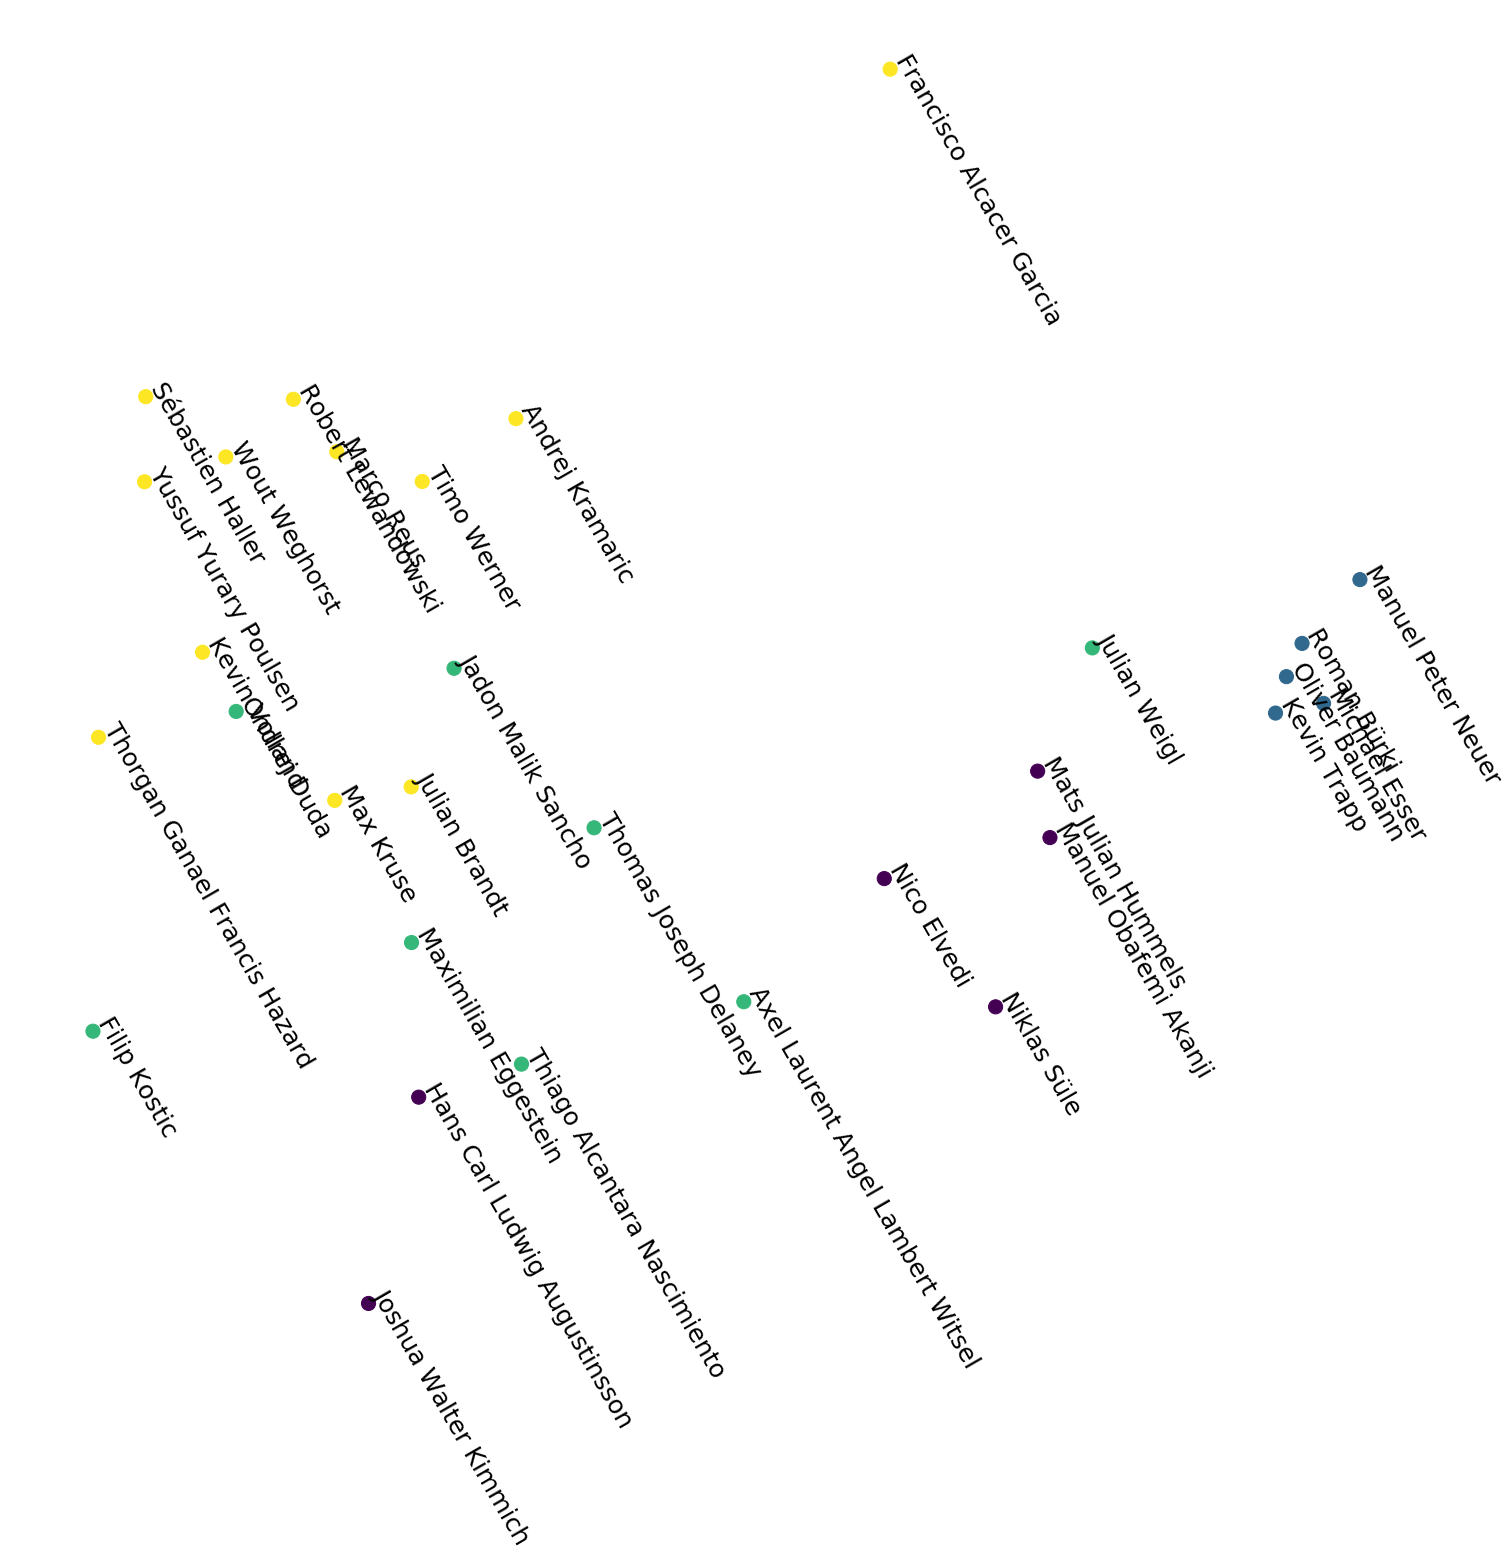

In [25]:
# for printing only
plt.figure(figsize=(25,25))
# plt.figure(dpi=600)
# plt.figure(dpi=300)

plt.axis('off')

plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=colors, s=200)
for name, x_pos, y_pos in zip(names, embeddings_2d[:, 0], embeddings_2d[:, 1]):
#   print(name, (x_pos, y_pos))
  plt.annotate(name, (x_pos, y_pos),  rotation=-60, size=25)

In [0]:
pca = PCA(n_components=1)
embeddings_1d = pca.fit_transform(Y_std)

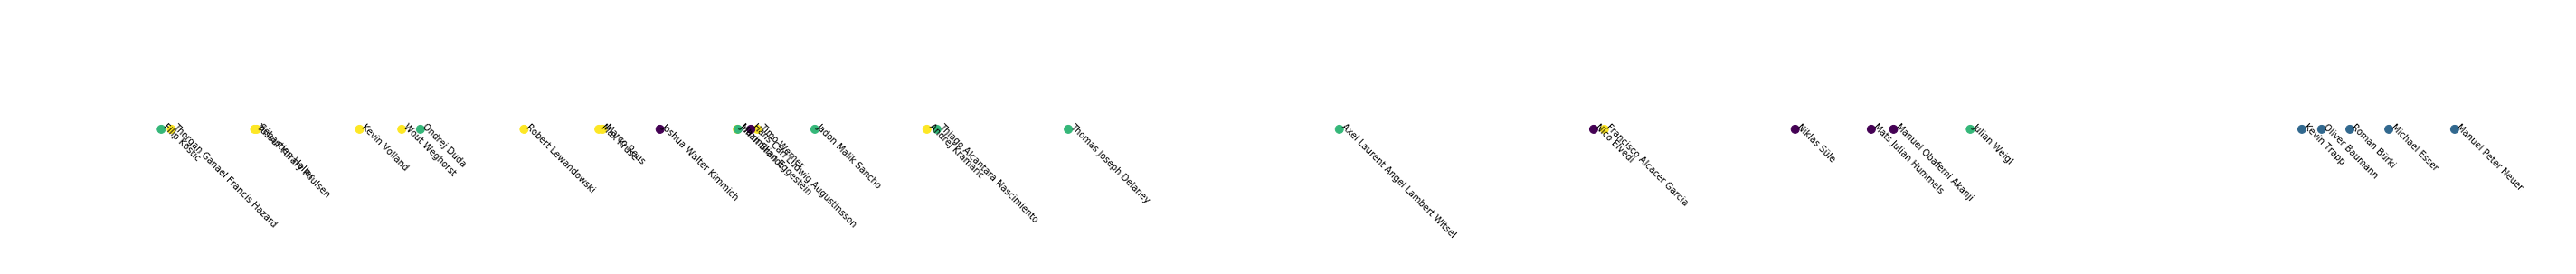

In [30]:
import numpy as np

# for printing only
plt.figure(figsize=(50,5))
# plt.figure(dpi=300)

plt.axis('off')

plt.scatter(embeddings_1d, np.zeros(len(embeddings_1d)), c=colors, s=80)
for name, x_pos in zip(names, embeddings_1d):
  plt.annotate(name, (x_pos, 0), rotation=-45)

## Now Embeddings

In [0]:
pca = PCA()

In [14]:
pca.fit(Y_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [15]:
pca.explained_variance_ratio_

array([3.75915186e-01, 1.62459733e-01, 1.41294021e-01, 8.62625229e-02,
       5.11526254e-02, 4.34278264e-02, 3.19342998e-02, 2.31435092e-02,
       1.86411444e-02, 1.62773638e-02, 1.19008065e-02, 9.17895370e-03,
       8.70674208e-03, 5.79201065e-03, 4.78182984e-03, 2.78468426e-03,
       2.07625805e-03, 1.54512070e-03, 1.13032327e-03, 5.77150529e-04,
       4.59165355e-04, 2.95799292e-04, 1.60061136e-04, 7.24671635e-05,
       3.03955420e-05, 1.98139510e-33, 1.98139510e-33, 1.98139510e-33,
       1.98139510e-33, 1.98139510e-33, 1.98139510e-33])

In [0]:
n_components = 14

In [0]:
pca = PCA(n_components=n_components)
Y_std_pca = pca.fit_transform(Y_std)

In [0]:
Y = Y_std_pca
Y = Y.reshape(len(Y_std_pca), 1, n_components)

In [0]:
import numpy as np

x = np.array(df.index)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

## First we prove that the archtiecture can learn to reproduce the output as closely as desired

This makes sure that the embedding really becomes the bottleneck and not other parts of the model

In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, Embedding, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential, Model

embedding_dim = n_components
n_players = len(x)
n_features = Y_std_pca.shape[1]

dropout = .4
recurrent_dropout = .4

model = Sequential()
model.add(Embedding(name='embedding',
                    input_dim=n_players, 
                    output_dim=embedding_dim, 
                    input_length=1))

model.add(Dense(units=10, name='hidden1', activation='tanh'))
# model.add(Dense(units=50, name='hidden2', activation='tanh'))

# model.add(BatchNormalization())
# model.add(Dropout(dropout))

model.add(Dense(units=n_features, name='output', activation='linear'))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1, 14)             364       
_________________________________________________________________
hidden1 (Dense)              (None, 1, 10)             150       
_________________________________________________________________
output (Dense)               (None, 1, 14)             154       
Total params: 668
Trainable params: 668
Non-trainable params: 0
_________________________________________________________________


In [0]:
%%time

EPOCHS=500
BATCH_SIZE=1

history = model.fit(x, Y, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)

CPU times: user 48.1 s, sys: 5.31 s, total: 53.4 s
Wall time: 36.2 s


In [0]:
loss = model.evaluate(x, Y, batch_size=BATCH_SIZE)
loss

26/26 [==============================] - 0s 3ms/sample - loss: 0.0683


0.06828095694072545

In [0]:
model.predict([0])

array([[[-3.3261404e+00,  1.9220288e+00,  3.0186443e+00, -1.6393831e+00,
          1.1744673e+00, -2.2580141e-01,  5.7819909e-01, -2.0585941e-01,
          1.8761224e-01, -1.0691866e+00, -2.6636224e-02,  1.0547814e-02,
         -1.5189139e-02, -2.5639916e-04]]], dtype=float32)

In [0]:
Y[0]

array([[-3.29862219,  1.92550053,  2.97745647, -1.65706016,  1.18469778,
        -0.22982443,  0.59047424, -0.21617609,  0.21856442, -1.05038903,
        -0.5053879 ,  0.20262308, -0.64611977,  0.49940276]])

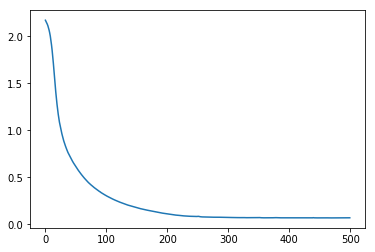

In [0]:
plt.plot(history.history['loss'])

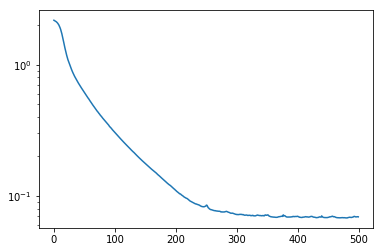

In [0]:
plt.yscale('log')
plt.plot(history.history['loss'])

## Next step is to reduce the embedding to 2 for visualization making it the bottle neck

In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, Embedding, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential, Model

embedding_dim = 2
n_players = len(x)
n_features = Y_std_pca.shape[1]

dropout = .4
recurrent_dropout = .4

model = Sequential()
model.add(Embedding(name='embedding',
                    input_dim=n_players, 
                    output_dim=embedding_dim, 
                    input_length=1))

model.add(Dense(units=5, name='hidden1', activation='tanh'))
# model.add(Dense(units=500, name='hidden2', activation='tanh'))

# model.add(BatchNormalization())
# model.add(Dropout(dropout))

model.add(Dense(units=n_features, name='output', activation='linear'))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1, 2)              62        
_________________________________________________________________
hidden1 (Dense)              (None, 1, 5)              15        
_________________________________________________________________
output (Dense)               (None, 1, 14)             84        
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [0]:
%%time

EPOCHS=500
BATCH_SIZE=1

history = model.fit(x, Y, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)

CPU times: user 55.7 s, sys: 6.28 s, total: 1min 2s
Wall time: 42 s


In [0]:
loss = model.evaluate(x, Y, batch_size=BATCH_SIZE)
loss

31/31 [==============================] - 0s 3ms/sample - loss: 0.6224


0.6223950443729278

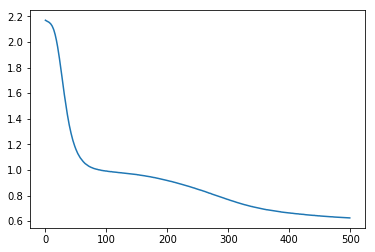

In [0]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])

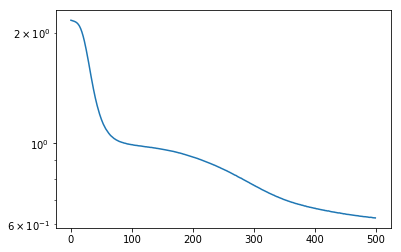

In [0]:
plt.yscale('log')
plt.plot(history.history['loss'])

In [0]:
model.predict([0])

array([[[-3.6855779 ,  2.1291666 ,  2.3360155 , -0.44531152,
          0.85640574,  0.5935229 ,  0.49799672,  0.086713  ,
         -0.15213951, -0.06507219,  0.15323009,  0.13964099,
         -0.11954376,  0.06648553]]], dtype=float32)

In [0]:
Y[0]

array([[-3.3102058 ,  2.29628949,  3.12254622, -1.90883148,  0.93162879,
         0.33892424, -0.40775411, -0.46876546,  0.54649332, -0.97916303,
         0.52152601, -0.91245457, -0.17801456,  0.36686269]])

In [0]:
embedding_layer = model.get_layer('embedding')
embedding_model = Model(inputs=model.input, outputs=embedding_layer.output)
embeddings_2d = embedding_model.predict(x).reshape(-1, 2)

In [0]:
embeddings_2d

array([[ 1.52215672e+00,  6.84545636e-01],
       [ 7.07266688e-01,  1.62566096e-01],
       [ 4.03284818e-01, -1.52988422e+00],
       [-8.31186699e-05, -3.17453772e-01],
       [ 2.08356524e+00, -2.20766112e-01],
       [ 1.18886754e-01, -9.51308012e-03],
       [ 1.86941063e+00,  1.55147290e+00],
       [ 3.04298908e-01,  2.66736001e-01],
       [-1.65304437e-01,  1.31556422e-01],
       [ 2.07160378e+00,  1.56725395e+00],
       [-3.34761530e-01,  1.68121696e-01],
       [ 1.29850328e-01,  2.44001523e-01],
       [-7.51914024e-01,  6.85913682e-01],
       [-2.67362058e-01,  4.30179015e-02],
       [-8.67502630e-01,  6.69662833e-01],
       [-6.72231376e-01,  6.44930661e-01],
       [ 3.40776175e-01,  3.21991771e-01],
       [-1.43008411e-01,  4.70878035e-01],
       [-6.85385942e-01,  4.88450378e-01],
       [-1.24752855e+00, -2.17620477e-01],
       [-6.87581539e-01,  9.36596572e-01],
       [-1.00119472e+00,  6.16715550e-01],
       [-1.64025736e+00,  9.33020473e-01],
       [-1.

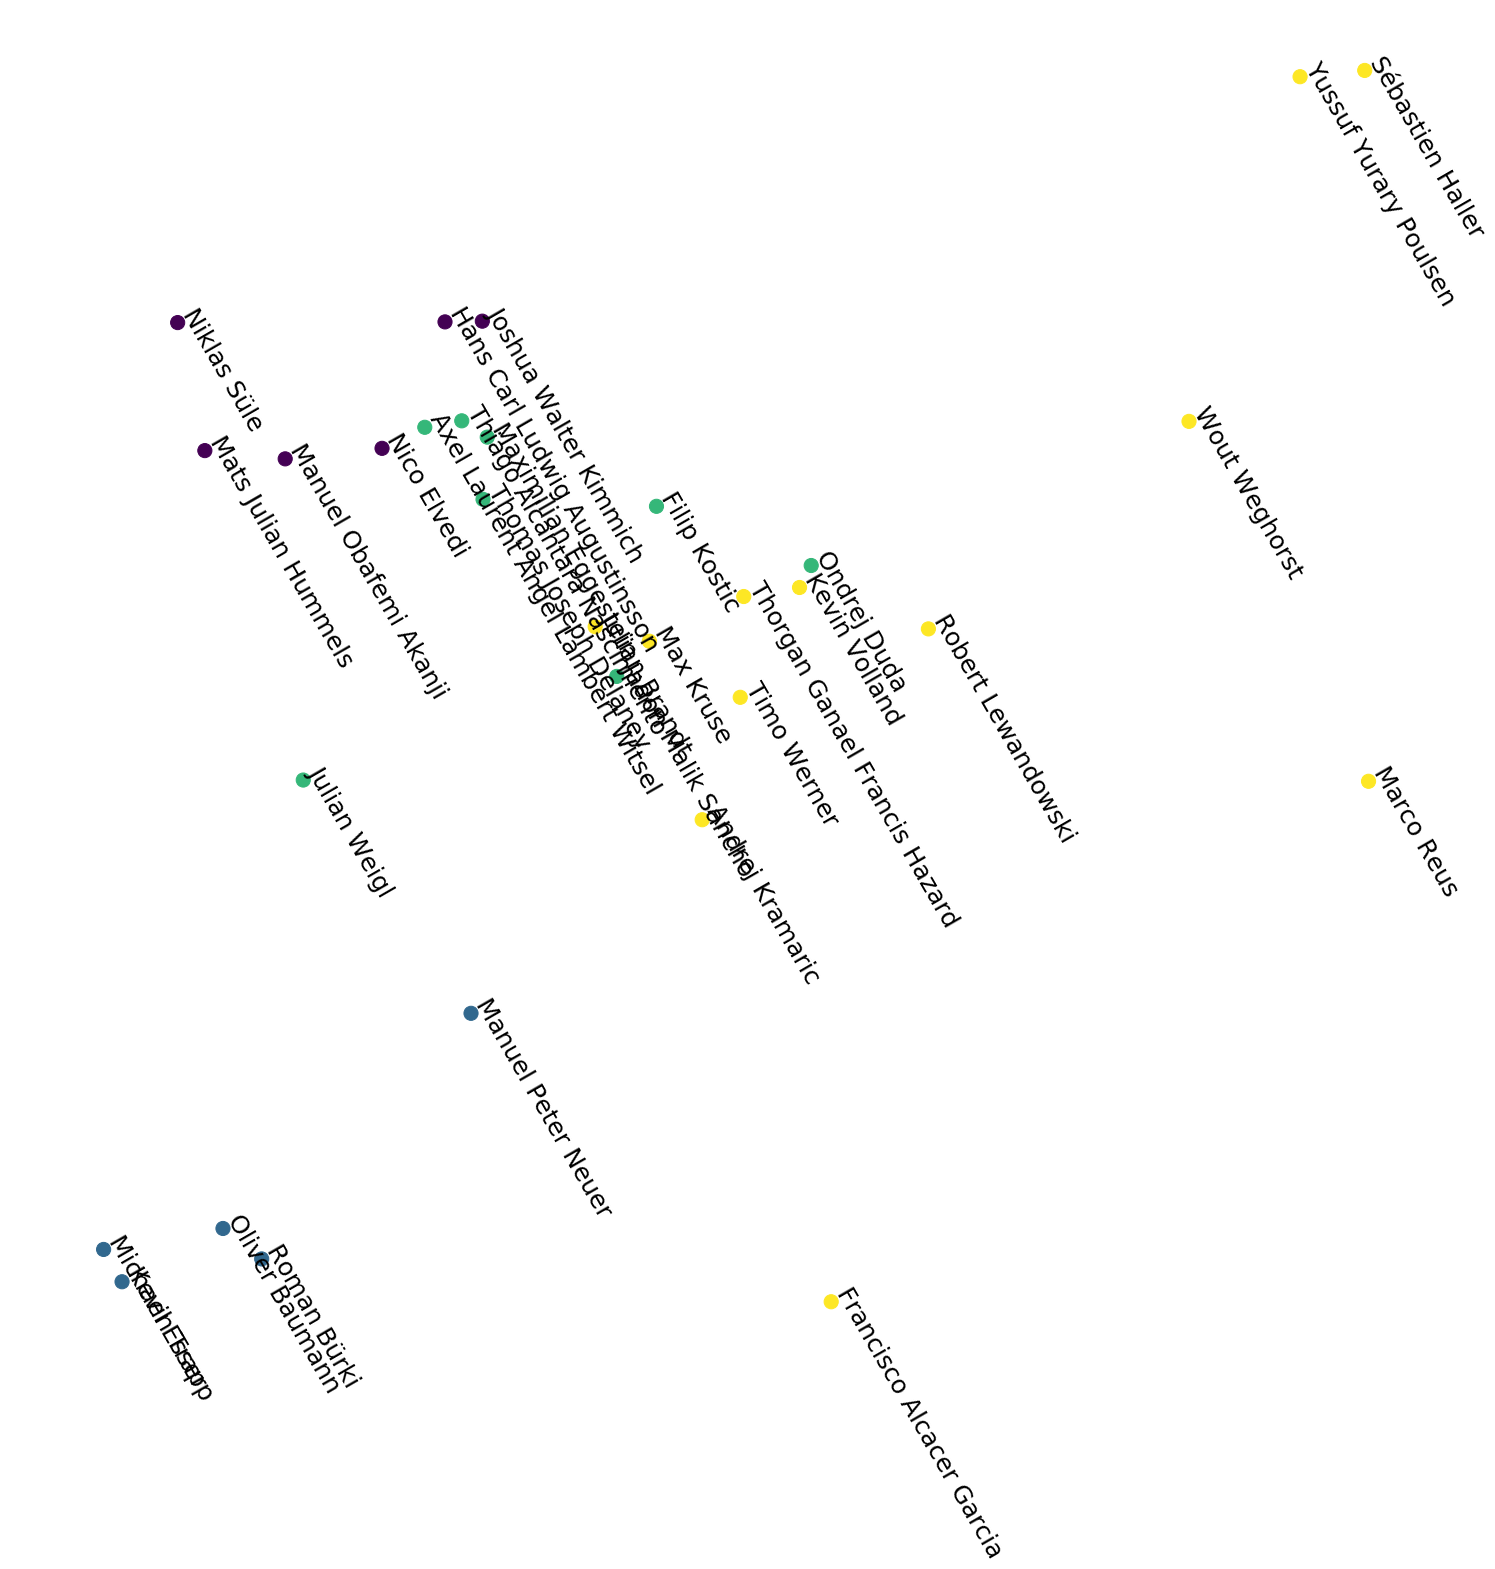

In [0]:
# for printing only
plt.figure(figsize=(25,25))
# plt.figure(dpi=600)
# plt.figure(dpi=300)

plt.axis('off')

plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=colors, s=200)
for name, x_pos, y_pos in zip(names, embeddings_2d[:, 0], embeddings_2d[:, 1]):
#   print(name, (x_pos, y_pos))
  plt.annotate(name, (x_pos, y_pos),  rotation=-60, size=25)

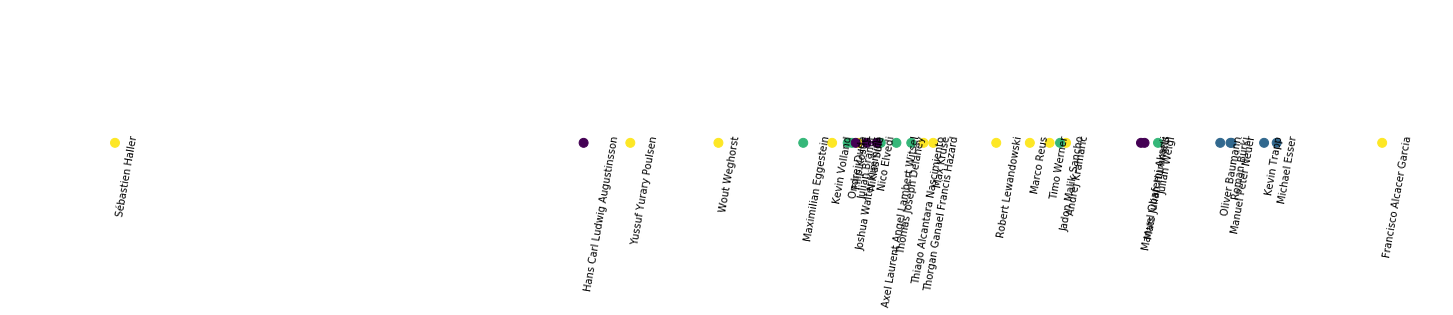

In [0]:
import numpy as np

embeddings_1d = embeddings_2d[:, 0]

# for printing only
plt.figure(figsize=(25,5))
# plt.figure(dpi=300)

plt.axis('off')

plt.scatter(embeddings_1d, np.zeros(len(embeddings_1d)), c=colors, s=80)
for name, x_pos in zip(names, embeddings_1d):
  plt.annotate(name, (x_pos, 0), rotation=80)

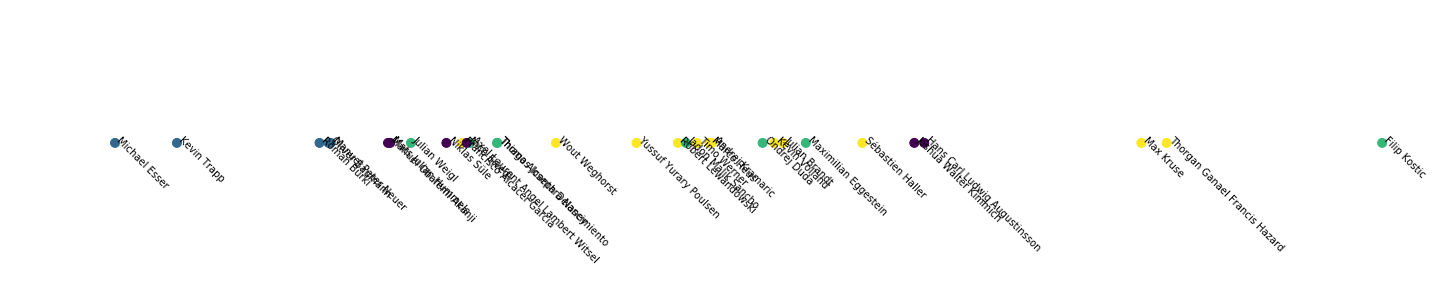

In [0]:
import numpy as np

embeddings_1d = embeddings_2d[:, 1]

# for printing only
plt.figure(figsize=(25,5))
# plt.figure(dpi=300)

plt.axis('off')

plt.scatter(embeddings_1d, np.zeros(len(embeddings_1d)), c=colors, s=80)
for name, x_pos in zip(names, embeddings_1d):
  plt.annotate(name, (x_pos, 0), rotation=-45)

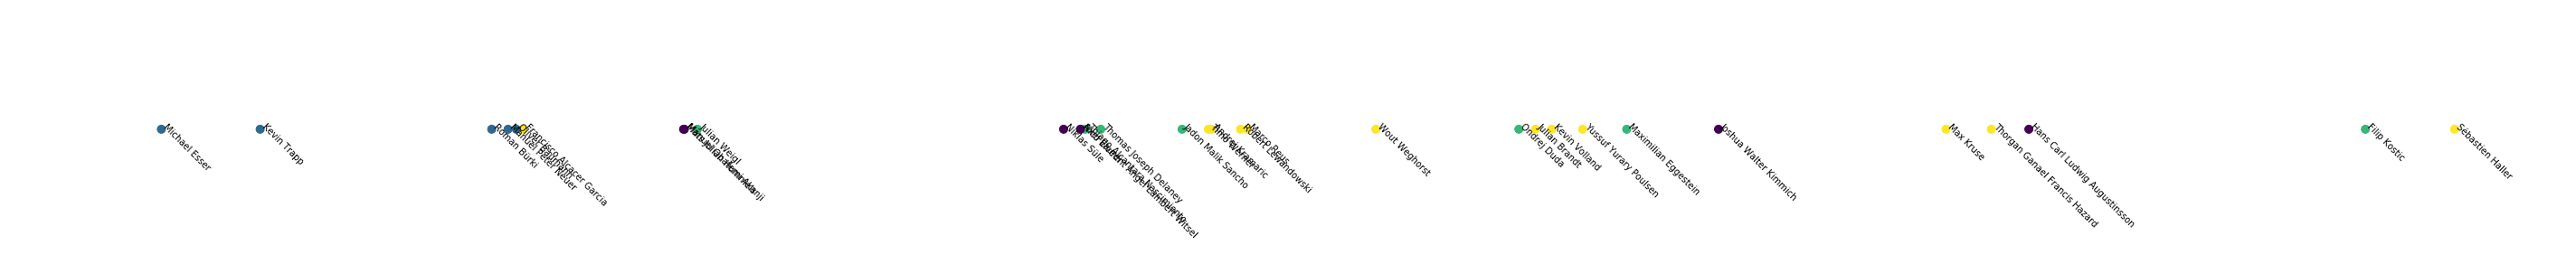

In [0]:
import numpy as np

embeddings_1d = PCA(n_components=1).fit_transform(embeddings_2d)

# for printing only
plt.figure(figsize=(50,5))
# plt.figure(dpi=300)

plt.axis('off')

plt.scatter(embeddings_1d, np.zeros(len(embeddings_1d)), c=colors, s=80)
for name, x_pos in zip(names, embeddings_1d):
  plt.annotate(name, (x_pos, 0), rotation=-45)

## One dimension Embedding

In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, Embedding, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential, Model

embedding_dim = 1
n_players = len(x)
n_features = Y_std_pca.shape[1]

dropout = .7

model = Sequential()
model.add(Embedding(name='embedding',
                    input_dim=n_players, 
                    output_dim=embedding_dim, 
                    input_length=1))

model.add(Dense(units=5, name='hidden1', activation='tanh'))
# model.add(Dense(units=500, name='hidden2', activation='tanh'))

# model.add(BatchNormalization())
# model.add(Dropout(dropout))

model.add(Dense(units=n_features, name='output', activation='linear'))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1, 1)              31        
_________________________________________________________________
hidden1 (Dense)              (None, 1, 5)              10        
_________________________________________________________________
output (Dense)               (None, 1, 14)             84        
Total params: 125
Trainable params: 125
Non-trainable params: 0
_________________________________________________________________


In [0]:
%%time

EPOCHS=500
BATCH_SIZE=1

history = model.fit(x, Y, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)

CPU times: user 55.8 s, sys: 6.22 s, total: 1min 2s
Wall time: 41.8 s


In [0]:
loss = model.evaluate(x, Y, batch_size=BATCH_SIZE)
loss

31/31 [==============================] - 0s 3ms/sample - loss: 1.2093


1.2093063463126459

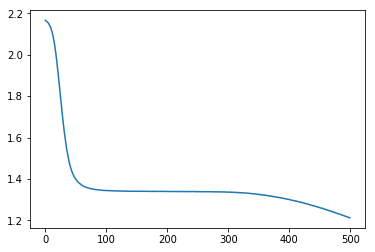

In [0]:
# plt.yscale('log')
plt.plot(history.history['loss'])

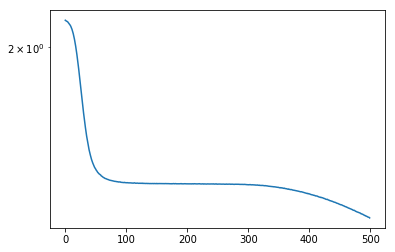

In [0]:
plt.yscale('log')
plt.plot(history.history['loss'])

In [0]:
embedding_layer = model.get_layer('embedding')
embedding_model = Model(inputs=model.input, outputs=embedding_layer.output)
embeddings_1d = embedding_model.predict(x).reshape(-1)

<Figure size 1800x1200 with 0 Axes>

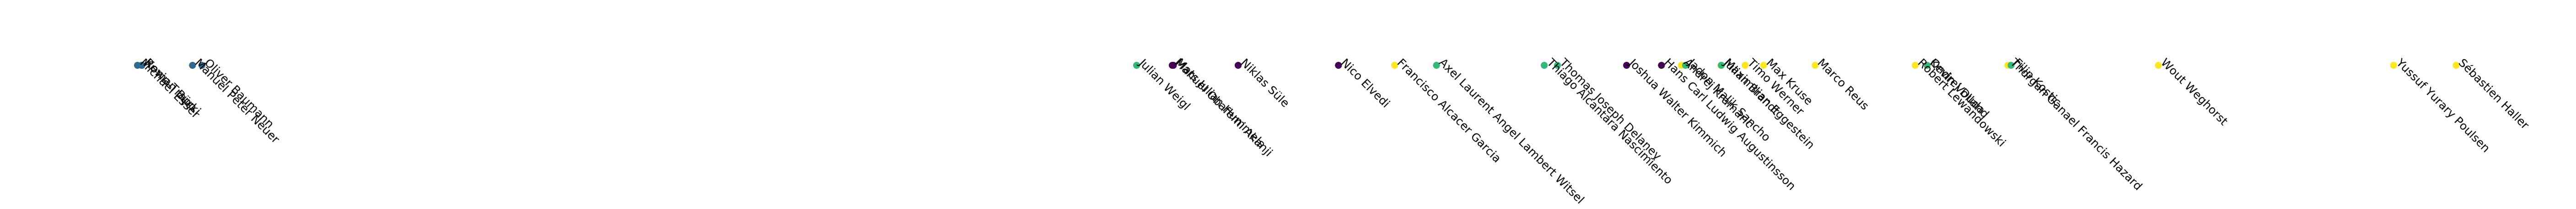

In [0]:
# for printing only
plt.figure(dpi=300)
plt.figure(figsize=(100,5))

plt.axis('off')

plt.scatter(embeddings_1d, np.zeros(len(embeddings_1d)), c=colors, s=200)
for name, x_pos in zip(names, embeddings_1d):
  plt.annotate(name, (x_pos, 0), rotation=-45, size=25)